In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=12,6

#### k-means

In [2]:
cd = pd.read_csv('clustering_data_1.csv')

In [3]:
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


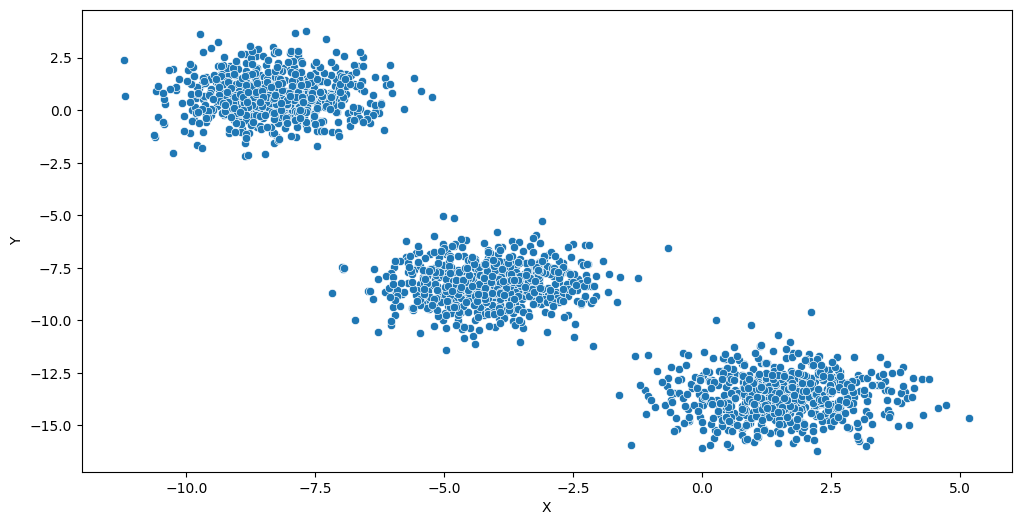

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(x='X',y='Y',data=cd)
plt.show()

In [6]:
Kmean=KMeans(n_clusters=2)

In [7]:
Kmean.fit(cd)

KMeans(n_clusters=2)

In [8]:
cluster_assignment=Kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

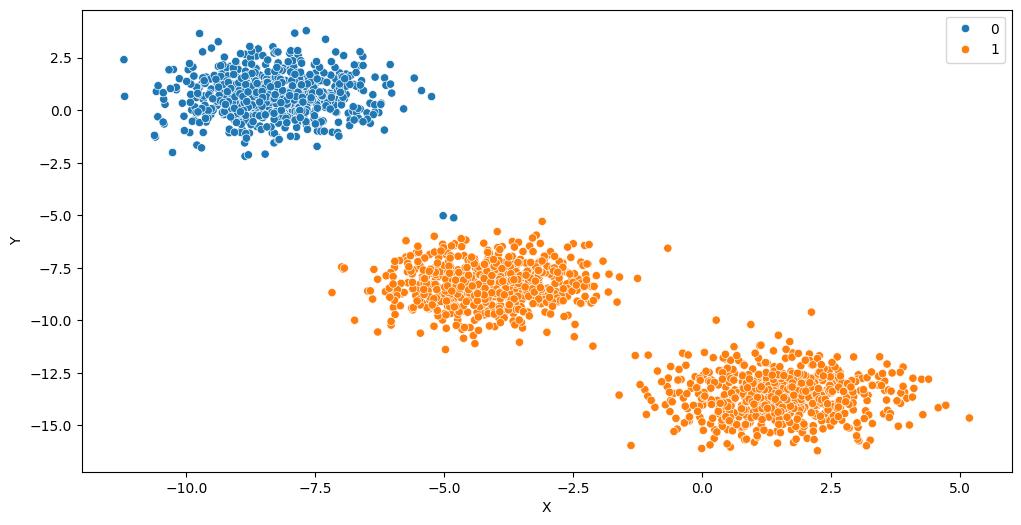

In [14]:
sns.scatterplot(x='X', y='Y', data=cd, hue=cluster_assignment)


In [15]:
Kmean=KMeans(n_clusters=3)

In [17]:
Kmean.fit(cd)

KMeans(n_clusters=3)

In [18]:
cluster_assignment=Kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

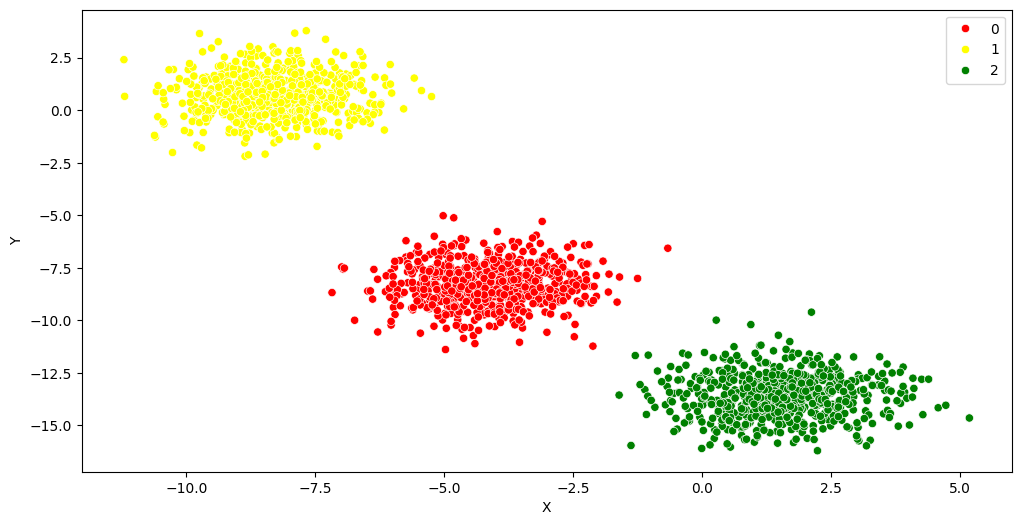

In [20]:
sns.scatterplot(x='X', y='Y', data=cd, hue=cluster_assignment,palette=['red','yellow','green'])

In [21]:
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


In [ ]:
cd['Predict cluster']